# Decision Tree on Medical Dataset 

By: Arash Hosseini Jafari

The following is a decion tree model built using Sklearn. 



Choosing the Algorythem:
The algorithm I chose was decision tree. This is partly due to my medical background and that has led me to the understanding that most diagnostic decisions in medicine are based decision tree analysis/thinking. 

Furthermore decision trees are a non-parametric supervised learning model that can be used for both classification and regression. It leads to simple decision rules for making a judgment based on input data. Besides their suitability for medical decision making they are rather convenient to use since little to no data prep is required and their inner workings is easier to understand. 

Unlike some deep learning methods which operate in a black box, decision tree logic boils down to simple boolean logic, which allows physicians to understand why the diagnostic model is making the life altering choices it is making. The model’s accuracy can als be validated with statistical tests.


Understanding and explaining the data set.

The data used comes from a prelabled medical diagnosis dataset of the acute inflammations of urinary bladder and acute nephritises. 

Datacleanup and processing: 
There was minimal data cleanup and the data was properly ordered from the start. Missing data was not an issue. One notable alteration I made was to convert body temprature to boolian values (ie: fever/ not fever), since continous temperature values has little to no clinical significance, while fever is an indication of infection. 

In [184]:
import pandas as pd
#fever,nausea,lumpain,urine,micpain,burning,inf,neph,
df = pd.read_csv("diagnosis.csv")
df.head(20)

,fever,nausea,lumpain,urine,micpain,burning,inf,neph,Unnamed: 8
0,no,no,yes,no,no,no,no,no,NaN
1,no,no,no,yes,yes,yes,yes,no,NaN
2,no,no,yes,no,no,no,no,no,NaN
3,no,no,yes,no,no,no,no,no,NaN
4,no,no,yes,no,no,no,no,no,NaN
5,no,no,no,yes,yes,yes,yes,no,NaN
6,no,no,no,yes,yes,yes,yes,no,NaN
7,no,no,no,yes,yes,yes,yes,no,NaN
8,no,no,no,yes,yes,yes,yes,no,NaN
9,no,no,yes,no,no,no,no,no,NaN


In [185]:
df.describe()

,Unnamed: 8
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
fever         99 non-null object
nausea        99 non-null object
lumpain       99 non-null object
urine         99 non-null object
micpain       99 non-null object
burning       99 non-null object
inf           99 non-null object
neph          99 non-null object
Unnamed: 8    0 non-null float64
dtypes: float64(1), object(8)
memory usage: 7.0+ KB


3. Training and Test Set:
A test set was created at random from the original data set. (see excel screenshots bellow)
While the LabelEncoder function was used for boolian conversion in the training set, the test set was made boolian using excel's countif function. 

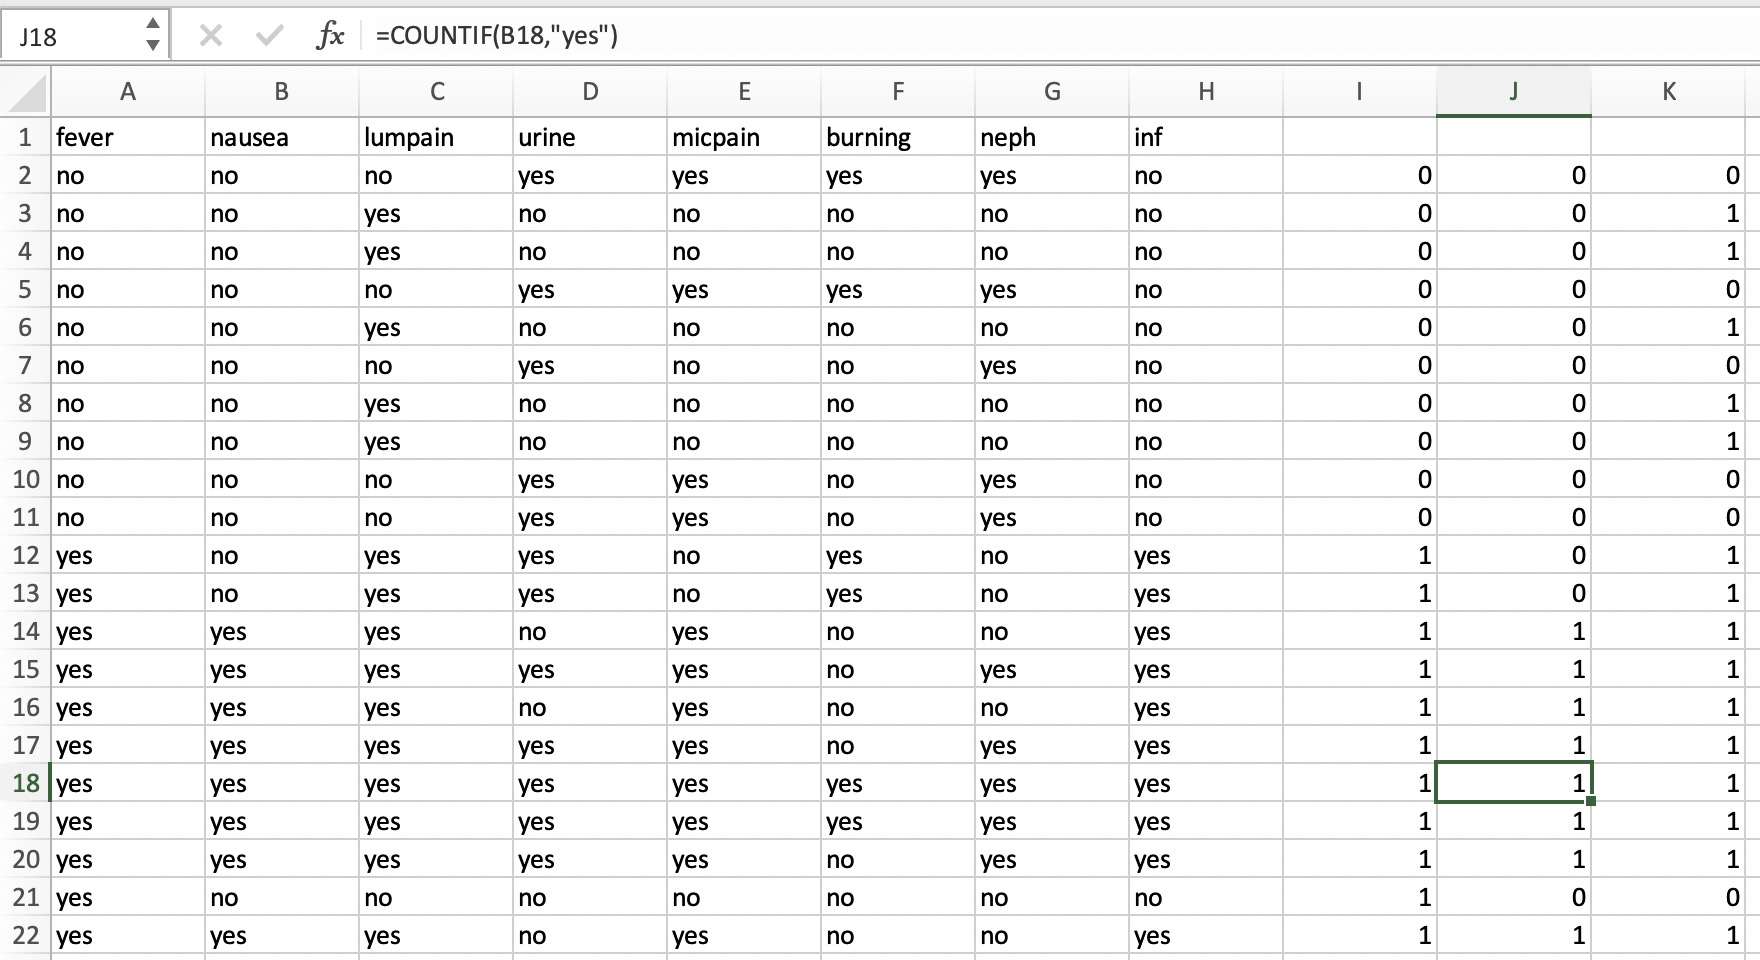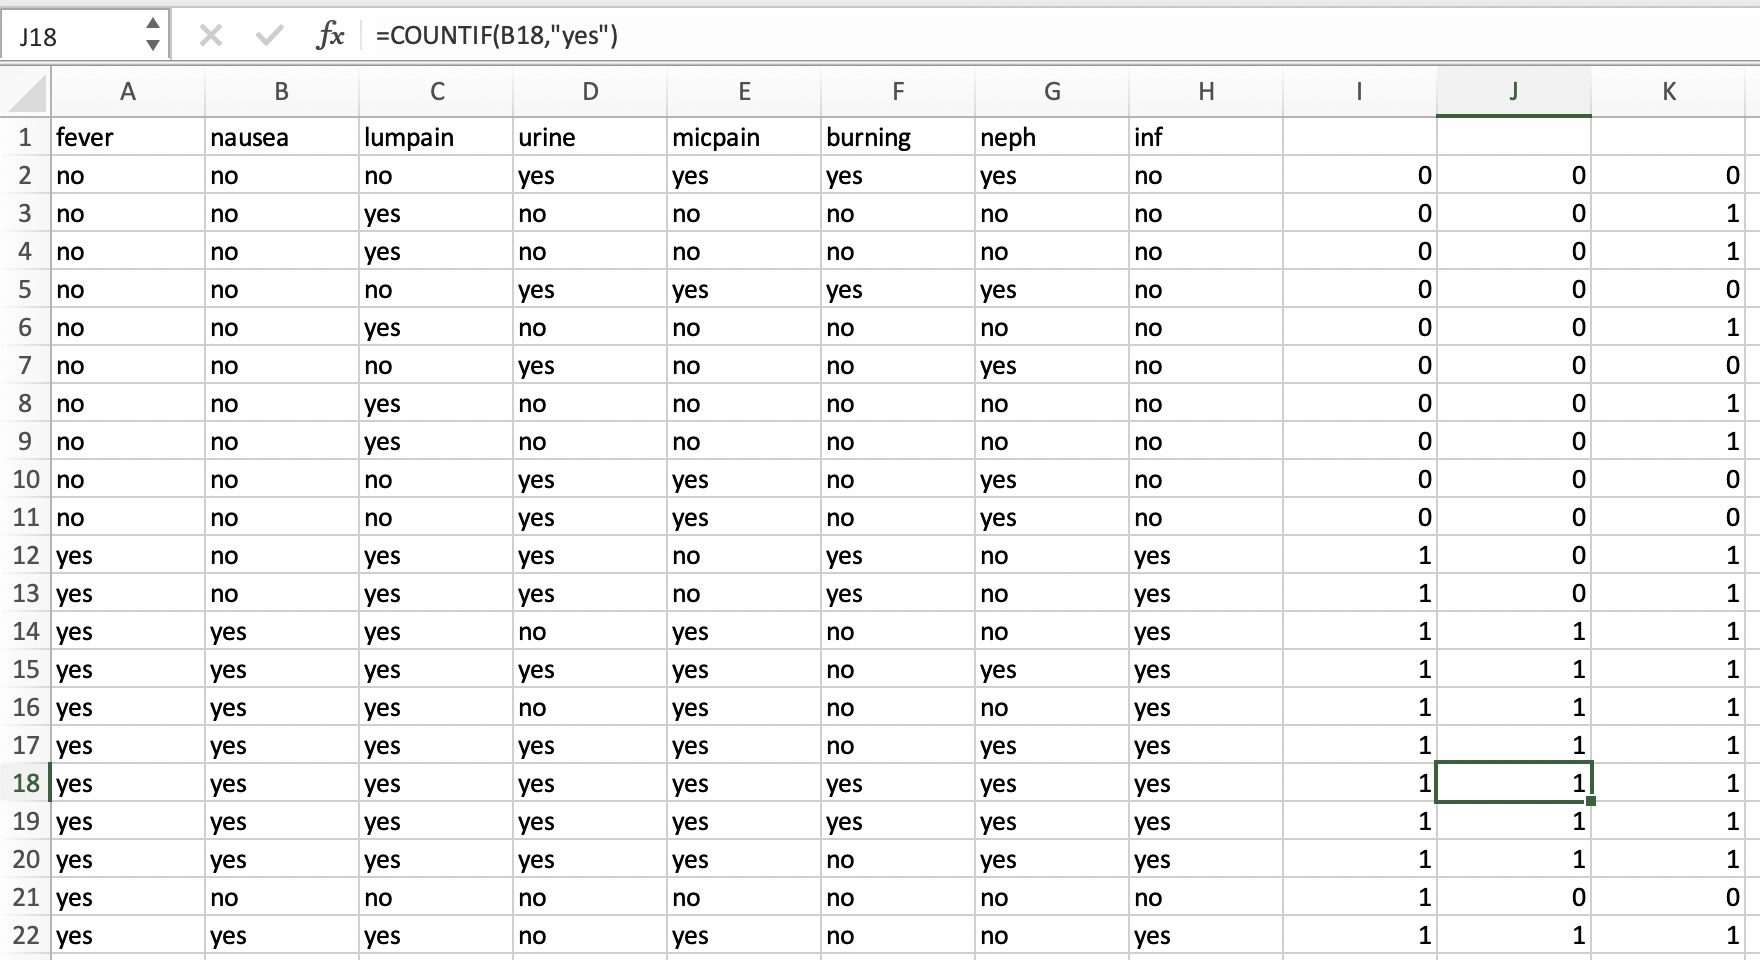:


In [187]:
inputs = df

from sklearn.preprocessing import LabelEncoder
le_fever = LabelEncoder()
le_nausea = LabelEncoder()
le_lumpain = LabelEncoder()
le_urine = LabelEncoder()
le_micpain = LabelEncoder()
le_burning = LabelEncoder()
le_inf = LabelEncoder()
le_neph = LabelEncoder()

In [188]:
import graphviz

In [189]:
inputs['fever_n'] = le_fever.fit_transform(inputs['fever'])
inputs['nausea_n'] = le_nausea.fit_transform(inputs['nausea'])
inputs['lumpain_n'] = le_lumpain.fit_transform(inputs['lumpain'])
inputs['urine_n'] = le_urine.fit_transform(inputs['urine'])
inputs['micpain_n'] = le_micpain.fit_transform(inputs['micpain'])
inputs['burning_n'] = le_burning.fit_transform(inputs['burning'])

In [190]:
#Indincating inf.. becuase the other is very self explanitory
target = inputs['inf']
targetB = inputs['neph']
#drop the results
inputs = df.drop(['neph','inf'],axis='columns')
#remove unnamed columns
inputs = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#print(inputs)
inputs_n = inputs.drop(['fever','nausea','lumpain','urine','micpain','burning','neph','inf'],axis='columns')
print(inputs_n)
#print (target)

    fever_n  nausea_n  lumpain_n  urine_n  micpain_n  burning_n
0         0         0          1        0          0          0
1         0         0          0        1          1          1
2         0         0          1        0          0          0
3         0         0          1        0          0          0
4         0         0          1        0          0          0
5         0         0          0        1          1          1
6         0         0          0        1          1          1
7         0         0          0        1          1          1
8         0         0          0        1          1          1
9         0         0          1        0          0          0
10        0         0          0        1          1          1
11        0         0          1        0          0          0
12        0         0          1        0          0          0
13        0         0          0        1          1          1
14        0         0          0        

In [191]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz

In [192]:
# from sklearn.tree import export_graphviz
# import graphviz
model = tree.DecisionTreeClassifier()
model =model.fit(inputs_n, target)
score = model.score(inputs_n,target)

print("Model accuracy: ",score,"\n")

clf = tree.DecisionTreeClassifier()

clf = clf.fit(inputs_n, target)
#graphviz.Source
tree.export_graphviz(clf)

#print(tree.export_graphviz(clf))
#Graph(format='png')
#plt.show()
for name, importance in zip(inputs_n.columns, clf.feature_importances_):
    print(name, importance)

Model accuracy:  1.0 

fever_n 0.0
nausea_n 0.0
lumpain_n 0.11889324960753529
urine_n 0.42256621797655236
micpain_n 0.4585405324159123
burning_n 0.0


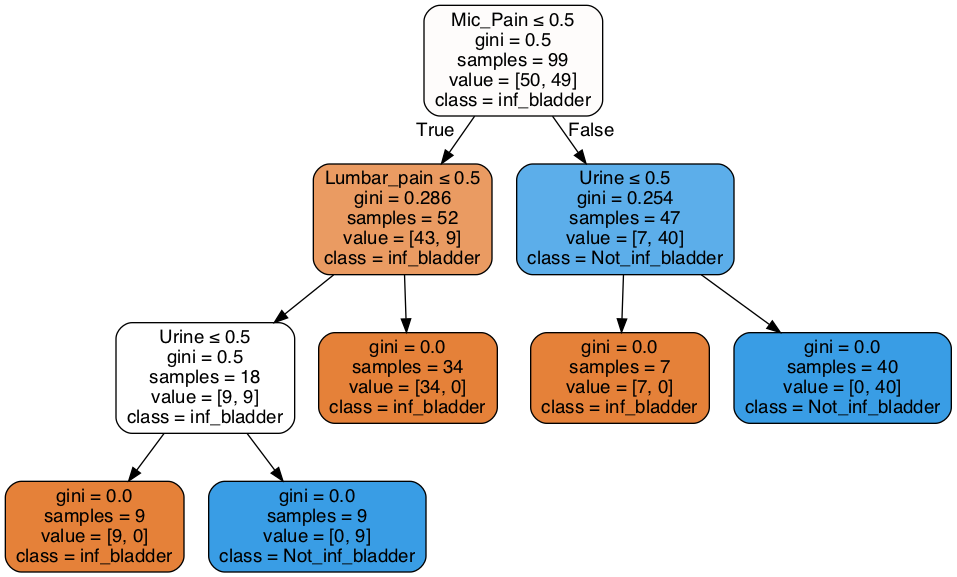

In [193]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names= ["Fever","Nausea","Lumbar_pain","Urine","Mic_Pain","Buring"], 
                class_names= ["inf_bladder","Not_inf_bladder"],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [194]:
# from sklearn.tree import export_graphviz
# import graphviz
modelB = tree.DecisionTreeClassifier()
modelB =model.fit(inputs_n, targetB)
scoreB = model.score(inputs_n,targetB)

print("Model accuracy: ",scoreB,"\n")


clf = tree.DecisionTreeClassifier()

clf = clf.fit(inputs_n, targetB)
#graphviz.Source
tree.export_graphviz(clf)

#print(tree.export_graphviz(clf))
#Graph(format='png')
#plt.show()
for name, importance in zip(inputs_n.columns, clf.feature_importances_):
    print(name, importance)

Model accuracy:  1.0 

fever_n 0.6918021445866482
nausea_n 0.0
lumpain_n 0.3081978554133518
urine_n 0.0
micpain_n 0.0
burning_n 0.0


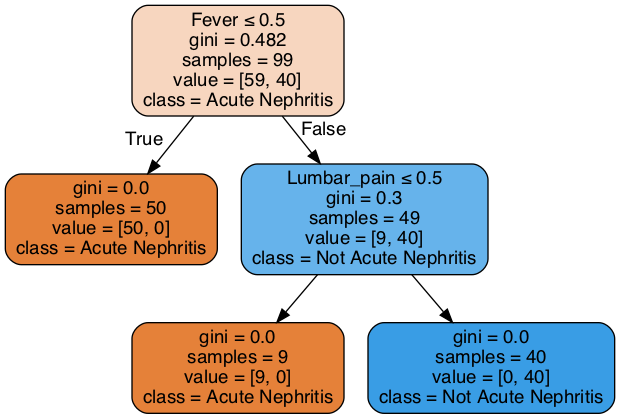

In [195]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names= ["Fever","Nausea","Lumbar_pain","Urine","Mic_Pain","Buring"], 
                class_names= ["Acute Nephritis","Not Acute Nephritis"],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [196]:
dft = pd.read_csv("testset.csv")

In [197]:
inputsT=dft

In [198]:
dft.head()

,fever,nausea,lumpain,urine,micpain,burning,inf,neph
0,0,0,0,1,1,1,1,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,1,1,1,1,0
4,0,0,1,0,0,0,0,0


In [199]:
le_fever = LabelEncoder()
le_nausea = LabelEncoder()
le_lumpain = LabelEncoder()
le_urine = LabelEncoder()
le_micpain = LabelEncoder()
le_burning = LabelEncoder()
le_inf = LabelEncoder()
le_neph = LabelEncoder()

In [200]:
inputsT['fever_n'] = le_fever.fit_transform(inputsT['fever'])
inputsT['nausea_n'] = le_nausea.fit_transform(inputsT['nausea'])
inputsT['lumpain_n'] = le_lumpain.fit_transform(inputsT['lumpain'])
inputsT['urine_n'] = le_urine.fit_transform(inputsT['urine'])
inputsT['micpain_n'] = le_micpain.fit_transform(inputsT['micpain'])
inputsT['burning_n'] = le_burning.fit_transform(inputsT['burning'])

In [201]:
targetT = inputsT['inf']
targetBT = inputsT['neph']
#drop the results
inputsT = dft.drop(['neph','inf'],axis='columns')
#remove unnamed columns
inputsT = dft.loc[:, ~dft.columns.str.contains('^Unnamed')]
#print(inputs)
inputs_nT = inputsT.drop(['fever','nausea','lumpain','urine','micpain','burning','neph','inf'],axis='columns')
#print(inputs_n)
#print (target)


In [202]:
print (inputs_nT)

    fever_n  nausea_n  lumpain_n  urine_n  micpain_n  burning_n
0         0         0          0        1          1          1
1         0         0          1        0          0          0
2         0         0          1        0          0          0
3         0         0          0        1          1          1
4         0         0          1        0          0          0
5         0         0          0        1          0          0
6         0         0          1        0          0          0
7         0         0          1        0          0          0
8         0         0          0        1          1          0
9         0         0          0        1          1          0
10        1         0          1        1          0          1
11        1         0          1        1          0          1
12        1         1          1        0          1          0
13        1         1          1        1          1          0
14        1         1          1        

In [205]:
test_pred = clf.predict(inputs_nT)
print("Acute Nephritis prediction on test set: ",test_pred)
test_pred

Acute Nephritis prediction on test set:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes']


array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes'], dtype=object)

In [ ]:
test_predB = model.predict(inputs_nT)
print("inflamatory bladder prediction on test set: ",test_pred)